This is my Time series project on product sale Dataset on  which we will do prediction.
lets take dataset of product sale 

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
lets install required libraries like seaborn, matplotlob for plotting or visualization.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

In [5]:
# df=pd.read_csv(r"C:\Users\santo\Downloads\demand-forecasting-kernels-only\sample_submission.csv")
df_train=pd.read_csv(r"C:\Users\santo\Downloads\demand-forecasting-kernels-only\train.csv")
# df_test=pd.read_csv(r"C:\Users\santo\Downloads\demand-forecasting-kernels-only\test.csv")

In [ ]:
Here we have Training Dataset we have assigned  as df_train 

In [6]:
# df.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


In [7]:
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [8]:
# df_test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


Now after assigning dataset as df_train we will check Datatypes of our dataset. null values and dublicate values in each columns.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [13]:
df_train['date'].hasnans

False

In [14]:
df_train['store'].hasnans

False

In [15]:
df_train['item'].hasnans

False

In [16]:
df_train['sales'].hasnans

False

 we have seen that we havent any null values, now we will see unique values  in each columns of dataset.

In [17]:
df_train['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [18]:
df_train['date'].unique()[:10]

array(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
       '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
       '2013-01-09', '2013-01-10'], dtype=object)

In [19]:
df_train['date'].value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: date, Length: 1826, dtype: int64

In [20]:
df_train['date'].hasnans

False

Now we will convert from date column into date, month, year column saperately for study of dataset.

In [21]:
df_train['date']=pd.to_datetime(df_train['date'])
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [22]:
df_train['Year']=df_train['date'].dt.year
df_train['Month']=df_train['date'].dt.month
df_train['Day']=df_train['date'].dt.day
df_train=df_train.drop('date',axis=1)
df_train.head()

,store,item,sales,Year,Month,Day
0,1,1,13,2013,1,1
1,1,1,11,2013,1,2
2,1,1,14,2013,1,3
3,1,1,13,2013,1,4
4,1,1,10,2013,1,5


In below graph we will see daywise sales of product

<AxesSubplot:xlabel='Day', ylabel='sales'>

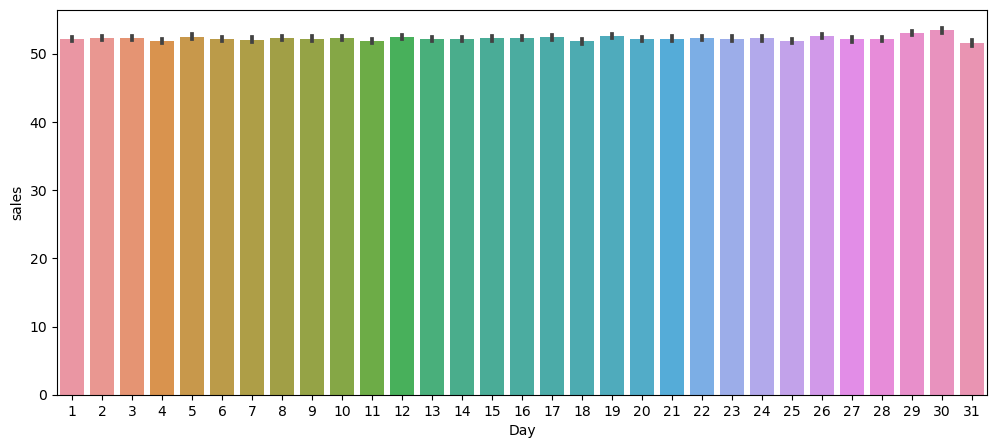

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x='Day',y='sales',data=df_train)

now in below graph we will see storage of each day of product.

<AxesSubplot:xlabel='Day', ylabel='store'>

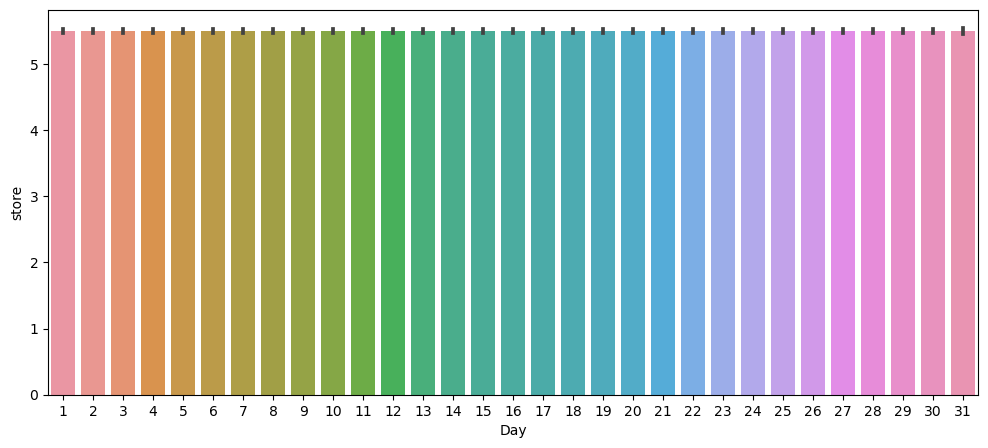

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x='Day',y='store',data=df_train)

In [25]:
df_train.head()

,store,item,sales,Year,Month,Day
0,1,1,13,2013,1,1
1,1,1,11,2013,1,2
2,1,1,14,2013,1,3
3,1,1,13,2013,1,4
4,1,1,10,2013,1,5


<AxesSubplot:xlabel='Day', ylabel='item'>

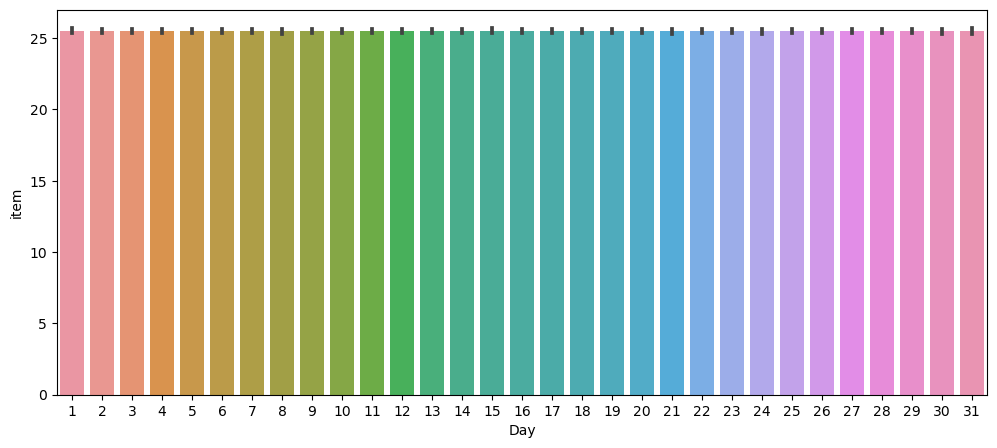

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(x='Day',y='item',data=df_train)

In [27]:
df_train=df_train.sort_values('sales',ascending=True)
df_train

,store,item,sales,Year,Month,Day
64289,6,4,0,2014,1,15
84341,7,5,1,2013,12,12
12050,7,1,1,2015,12,31
475123,1,27,1,2013,12,30
11329,7,1,1,2014,1,9
...,...,...,...,...,...,...
313889,2,18,208,2017,7,2
258759,2,15,209,2016,7,17
222596,2,13,210,2017,7,9
386579,2,22,214,2016,7,17


Now we will see the mothwise sales of product in below graph.

<AxesSubplot:xlabel='Month', ylabel='sales'>

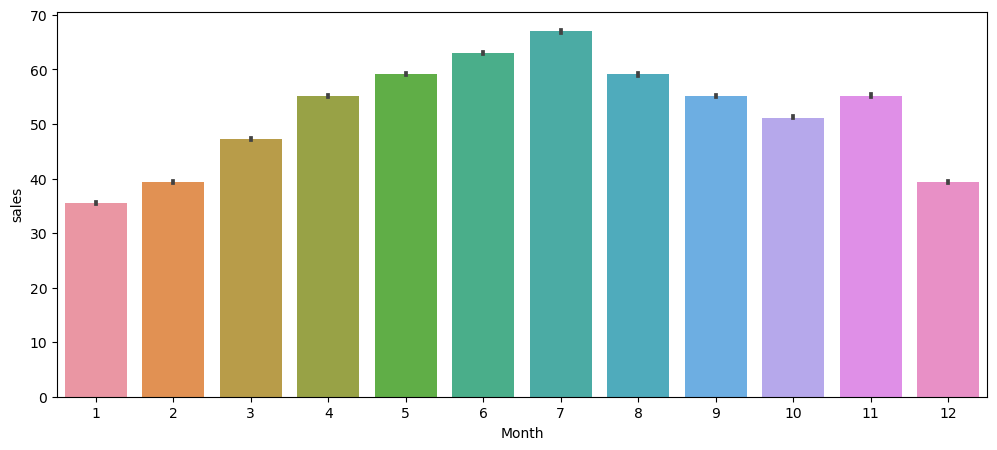

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(x='Month',y='sales',data=df_train)

Now we will see the mothwise Storage of product in below graph.

<AxesSubplot:xlabel='Month', ylabel='store'>

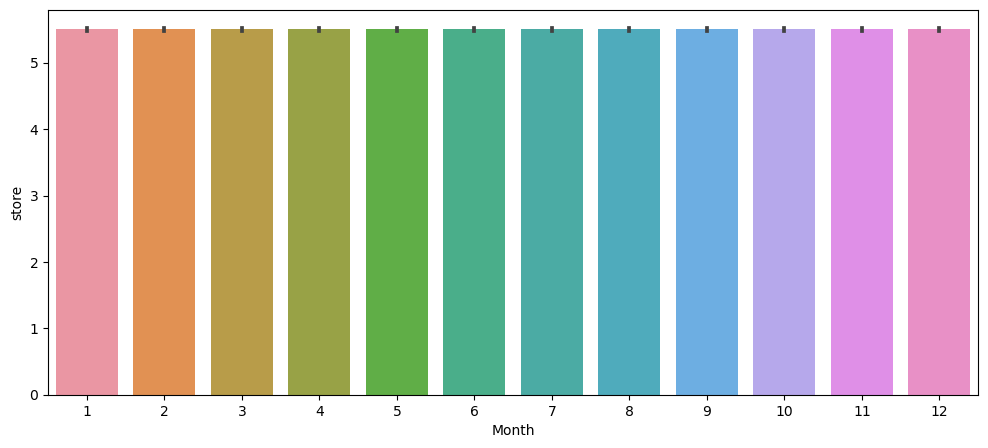

In [29]:
plt.figure(figsize=(12,5))
sns.barplot(x='Month',y='store',data=df_train)

<AxesSubplot:xlabel='Day', ylabel='item'>

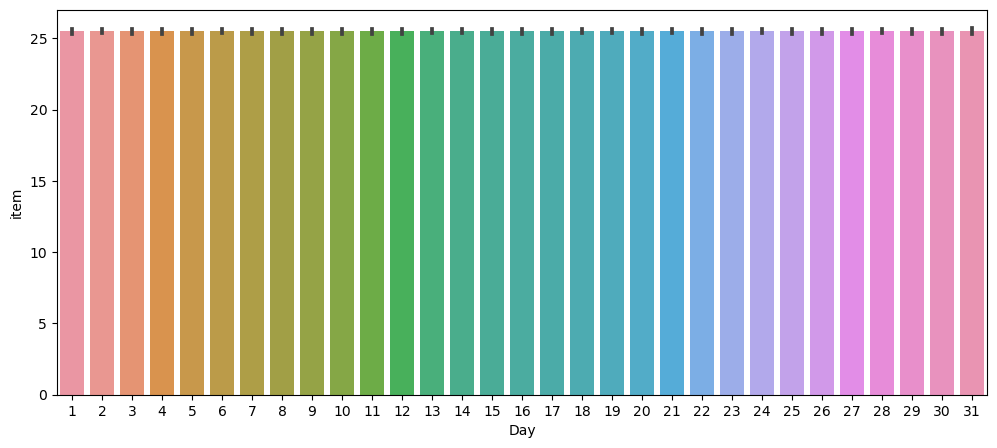

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(x='Day',y='item',data=df_train)

Now we will see the Yearly sales of product in below graph.

<AxesSubplot:xlabel='Year', ylabel='sales'>

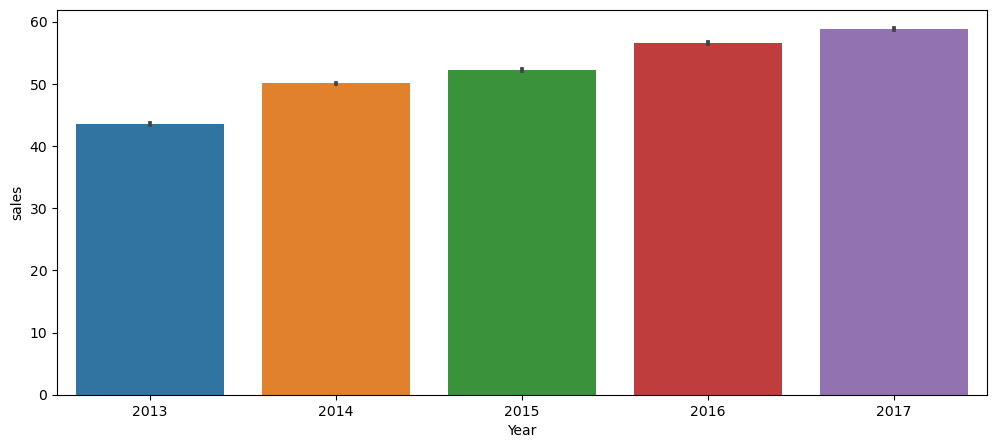

In [31]:
plt.figure(figsize=(12,5))
sns.barplot(x='Year',y='sales',data=df_train)

Here we will see count of each item.

<AxesSubplot:xlabel='item', ylabel='count'>

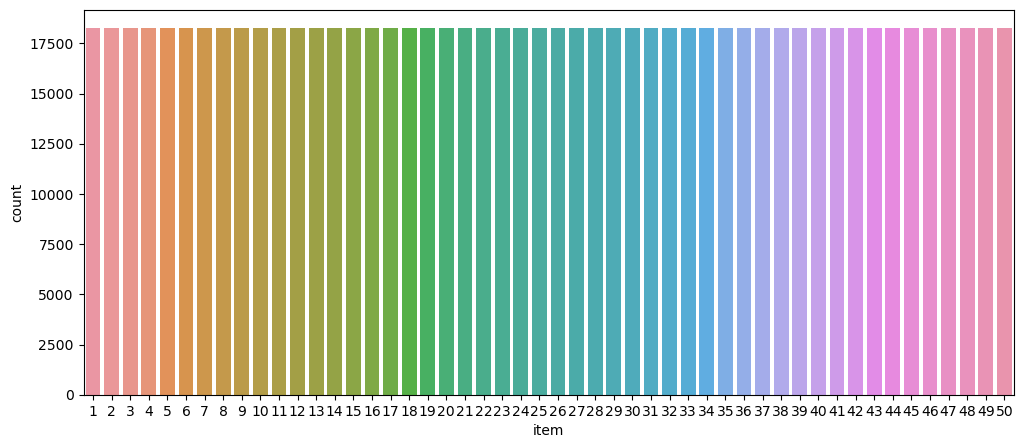

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='item',data=df_train)

Here we will see count of Sales in below graph.

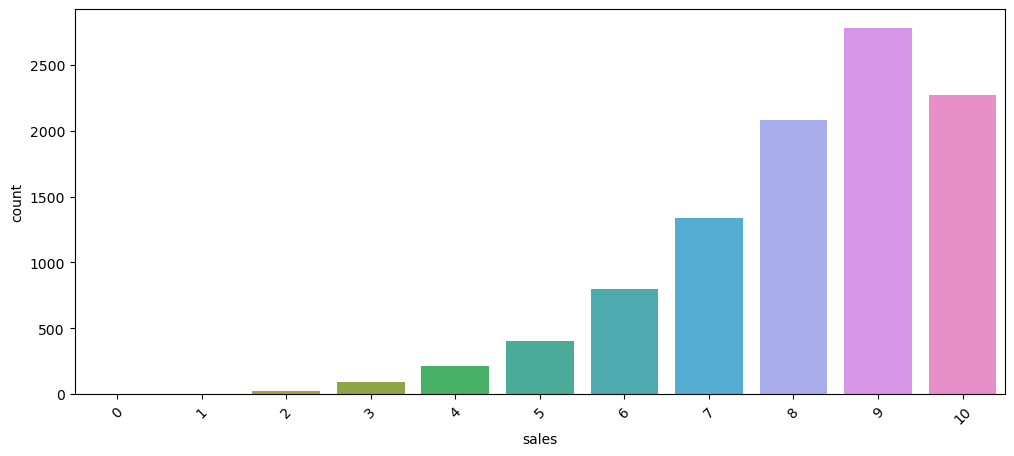

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x='sales',data=df_train.head(10000))
plt.xticks(rotation=45);

Here we will see Itemwise sales in below graph.

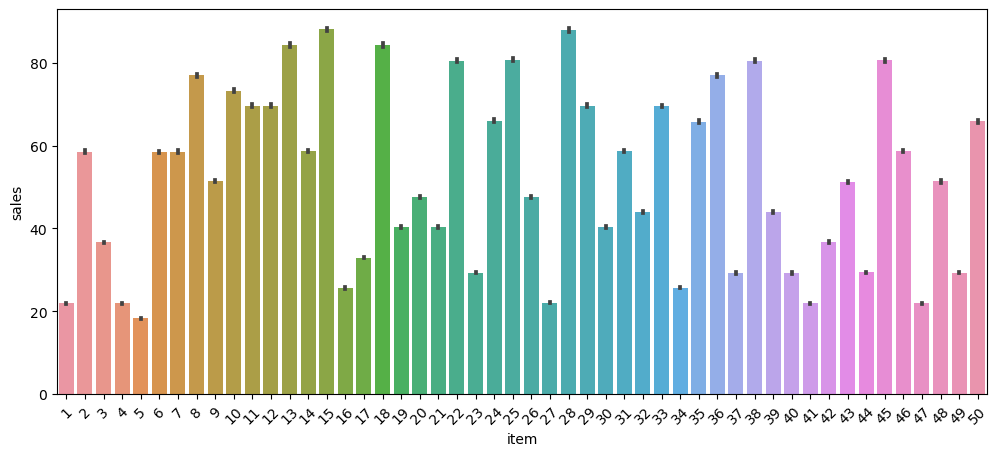

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(x='item',y='sales',data=df_train)
plt.xticks(rotation=45);

Here we will see both the summary statistics and a few of the quantiles Of The dataset at once Using describe() function.

In [35]:
df_train.describe()

,store,item,sales,Year,Month,Day
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287,2015.000548,6.523549,15.727820
std,2.872283,14.430878,28.801144,1.414021,3.448535,8.799329
min,1.000000,1.000000,0.000000,2013.000000,1.000000,1.000000
25%,3.000000,13.000000,30.000000,2014.000000,4.000000,8.000000
50%,5.500000,25.500000,47.000000,2015.000000,7.000000,16.000000
75%,8.000000,38.000000,70.000000,2016.000000,10.000000,23.000000
max,10.000000,50.000000,231.000000,2017.000000,12.000000,31.000000


Correlation of Dataset is,

<AxesSubplot:>

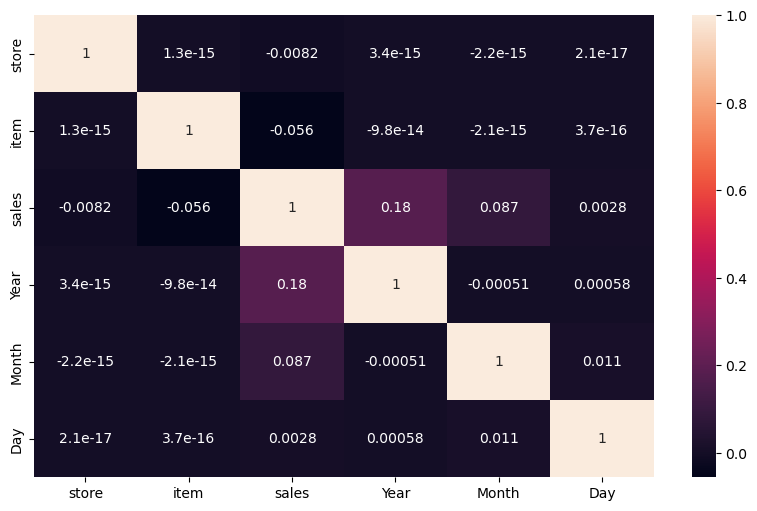

In [36]:
corr=df_train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

Line graph of Daywise sales..

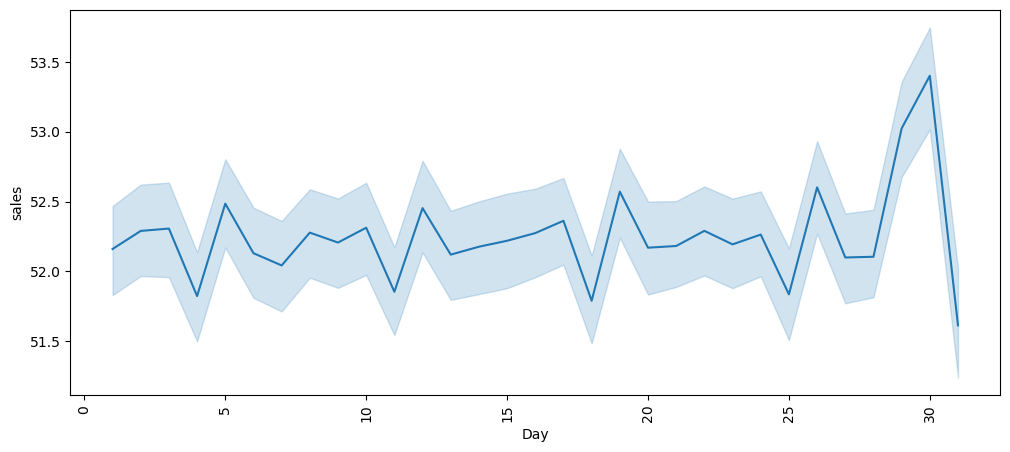

In [37]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Day',y='sales',data=df_train)
plt.xticks(rotation=90);

Line Graph of Monthwise Sales..

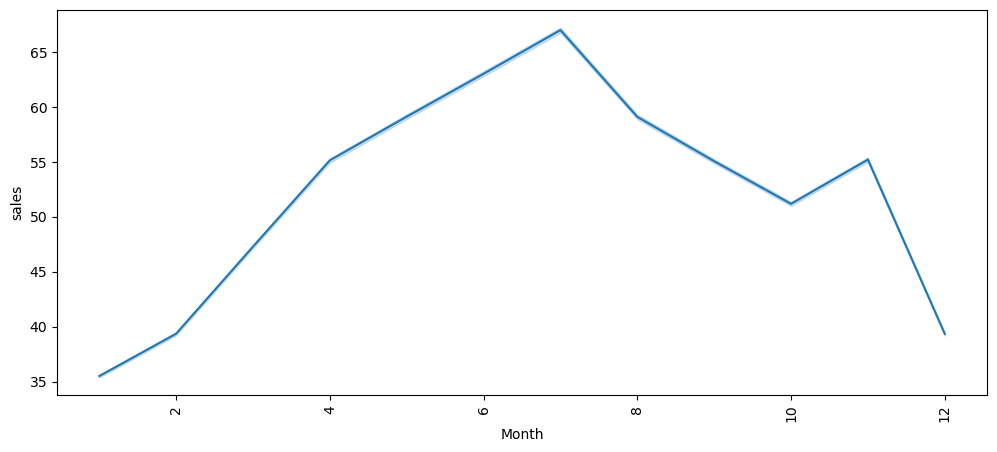

In [38]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='sales',data=df_train)
plt.xticks(rotation=90);

Line Graph of yearly Sales..

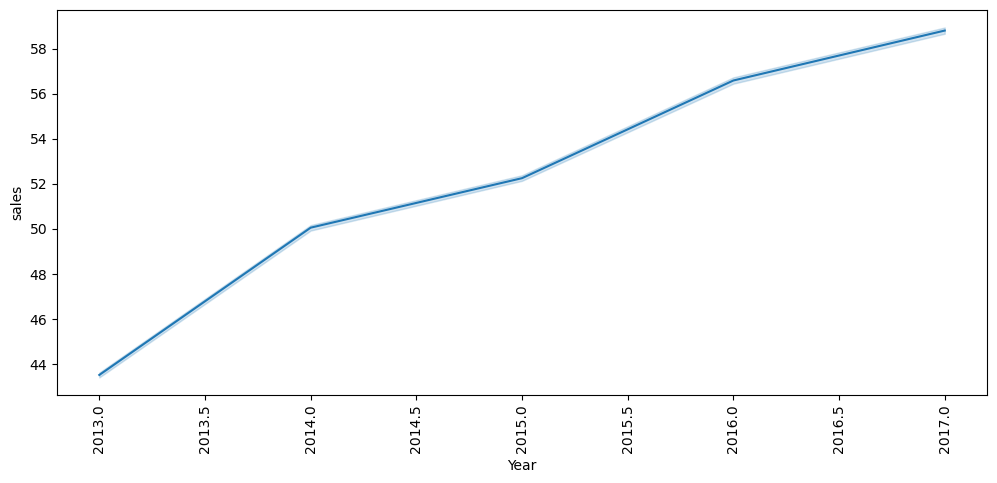

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='sales',data=df_train)
plt.xticks(rotation=90);

In [40]:
df_train.head()

,store,item,sales,Year,Month,Day
64289,6,4,0,2014,1,15
84341,7,5,1,2013,12,12
12050,7,1,1,2015,12,31
475123,1,27,1,2013,12,30
11329,7,1,1,2014,1,9


Here We will find Average Sales 

In [41]:
df_train['Sales_average']=df_train.mean(axis=1)
df_train

,store,item,sales,Year,Month,Day,Sales_average
64289,6,4,0,2014,1,15,340.000000
84341,7,5,1,2013,12,12,341.666667
12050,7,1,1,2015,12,31,344.500000
475123,1,27,1,2013,12,30,347.333333
11329,7,1,1,2014,1,9,338.833333
...,...,...,...,...,...,...,...
313889,2,18,208,2017,7,2,375.666667
258759,2,15,209,2016,7,17,377.666667
222596,2,13,210,2017,7,9,376.333333
386579,2,22,214,2016,7,17,379.666667


We are using head for reducing length of dstaset to reduce training time of model

In [42]:
sa_df=df_train.head(1000)
sa_df

,store,item,sales,Year,Month,Day,Sales_average
64289,6,4,0,2014,1,15,340.000000
84341,7,5,1,2013,12,12,341.666667
12050,7,1,1,2015,12,31,344.500000
475123,1,27,1,2013,12,30,347.333333
11329,7,1,1,2014,1,9,338.833333
...,...,...,...,...,...,...,...
14950,9,1,6,2013,12,9,341.666667
722027,6,40,6,2015,1,28,349.333333
85139,7,5,6,2016,2,18,342.333333
81596,5,5,6,2016,6,6,340.666667


In [13]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


 # Application of ARIMA Model

In [3]:
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df_train_main=df_train[['date','sales']]
df_train_main.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [5]:
df_train_main.isnull().sum()

date     0
sales    0
dtype: int64

In [6]:
df_train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [7]:
df_train_main['date']=pd.to_datetime(df_train_main['date'])
df_train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


C:\Users\santo\AppData\Local\Temp\ipykernel_12660\3052712539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_main['date']=pd.to_datetime(df_train_main['date'])


In [8]:
df_train_main.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


Here we have set date column as index..

In [9]:
df_train_main.set_index('date',inplace=True)

In [10]:
df_train_main.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


Now we will see sales Datewise..

<AxesSubplot:xlabel='date'>

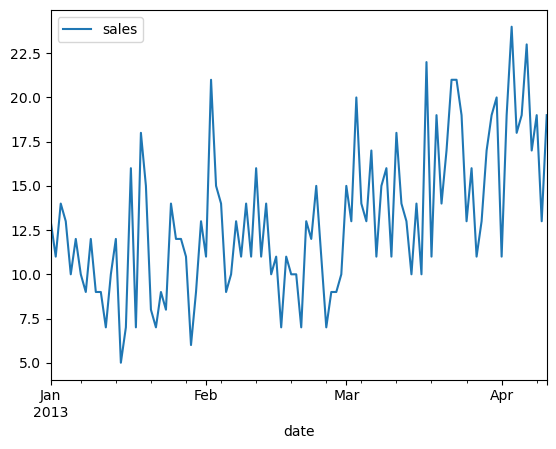

In [11]:
df_train_main.head(100).plot()

Lets Check The Dataset is Stationary or Non Stationary using Adfuller 

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adf_test(Series):
    result=adfuller(Series)
    print('ADF statistics:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('strong evidance against null hypothesis, reject the null hypothesis. dsts has no unit root and is stationary')
    else:
        print('Weak evidance against null hypothesis,time series has a unit root, indicating it is non stationary')

In [16]:
df_train_main['sales'].head(200)

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2013-07-15    18
2013-07-16    12
2013-07-17    16
2013-07-18    21
2013-07-19    25
Name: sales, Length: 200, dtype: int64

In [17]:
adf_test(df_train_main['sales'].head(200))

ADF statistics:-1.032632527824982
p-value: 0.741177091948134
Weak evidance against null hypothesis,time series has a unit root, indicating it is non stationary


This shows that The dataset is non stationary.. to reduce the value of p and make it stationary we will do first differencing

In [18]:
# Use Techniques Differencing
df_train_main['sales first Differencing']=df_train_main['sales']-df_train_main['sales'].shift()

C:\Users\santo\AppData\Local\Temp\ipykernel_12660\3796986369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_main['sales first Differencing']=df_train_main['sales']-df_train_main['sales'].shift()


In [19]:
df_train_main.head()

,sales,sales first Differencing
date,,
2013-01-01,13,NaN
2013-01-02,11,-2.0
2013-01-03,14,3.0
2013-01-04,13,-1.0
2013-01-05,10,-3.0


now we will do here second differencing..

In [20]:
# Use Techniques Differencing
df_train_main['sales second Differencing']=df_train_main['sales first Differencing']-df_train_main['sales first Differencing'].shift()
df_train_main.head()

C:\Users\santo\AppData\Local\Temp\ipykernel_12660\1353579864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_main['sales second Differencing']=df_train_main['sales first Differencing']-df_train_main['sales first Differencing'].shift()


,sales,sales first Differencing,sales second Differencing
date,,,
2013-01-01,13,NaN,NaN
2013-01-02,11,-2.0,NaN
2013-01-03,14,3.0,5.0
2013-01-04,13,-1.0,-4.0
2013-01-05,10,-3.0,-2.0


Here we will do 12 month differeencing also..

In [21]:
# 12 Month Differencing
df_train_main['sales 12 m_diff']=df_train_main['sales']-df_train_main['sales'].shift(12)
df_train_main.head()

,sales,sales first Differencing,sales second Differencing,sales 12 m_diff
date,,,,
2013-01-01,13,NaN,NaN,NaN
2013-01-02,11,-2.0,NaN,NaN
2013-01-03,14,3.0,5.0,NaN
2013-01-04,13,-1.0,-4.0,NaN
2013-01-05,10,-3.0,-2.0,NaN


In [ ]:
Here we will see Autocorrelation plot of first differencing..

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

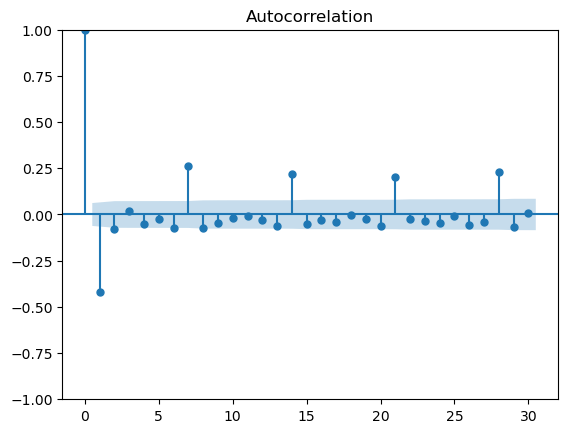

In [23]:
acf=plot_acf(df_train_main['sales first Differencing'].head(1000).dropna())

Here we will see Autocorrelation plot of Secod differencing..

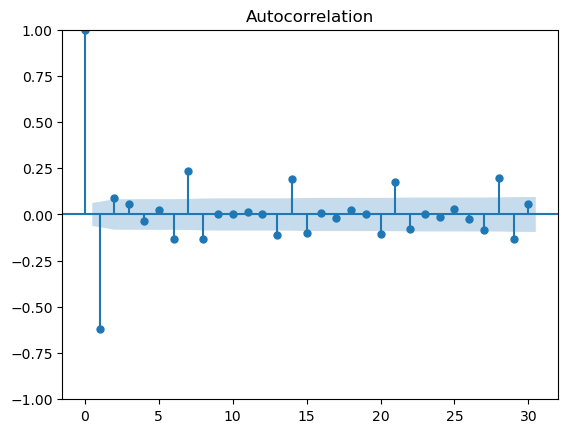

In [24]:
acf=plot_acf(df_train_main['sales second Differencing'].head(1000).dropna())

Here we will see Autocorrelation plot of 12_Month differencing..

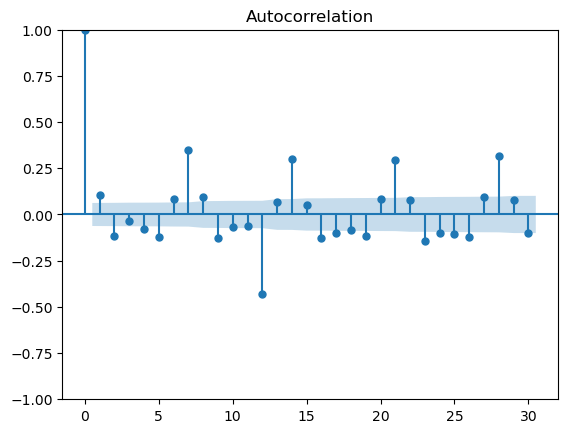

In [25]:
acf12=plot_acf(df_train_main['sales 12 m_diff'].head(1000).dropna())

Now Here is Partial Autocorrelation for 12 moth differencing..

C:\Users\santo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


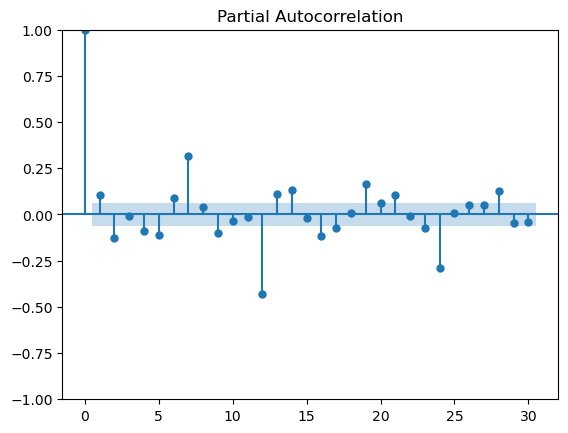

In [26]:
pacf=plot_pacf(df_train_main['sales 12 m_diff'].head(1000).dropna())

Here is our main Dataset with Columns Sales, First Differencing, Second Differencing and 12 month Diffeerencing..

In [27]:
# split Train & Test data
df_train_main

,sales,sales first Differencing,sales second Differencing,sales 12 m_diff
date,,,,
2013-01-01,13,NaN,NaN,NaN
2013-01-02,11,-2.0,NaN,NaN
2013-01-03,14,3.0,5.0,NaN
2013-01-04,13,-1.0,-4.0,NaN
2013-01-05,10,-3.0,-2.0,NaN
...,...,...,...,...
2017-12-27,63,22.0,32.0,-9.0
2017-12-28,59,-4.0,-26.0,7.0
2017-12-29,74,15.0,19.0,-12.0


In [28]:
from datetime import datetime, timedelta
train_dataset=datetime(2017,1,1)
test_dataset=datetime(2017,12,31)

Here are Our Trining and testing Dataset for training the model

In [29]:
train_data=df_train_main[:2017-1-27]
test_data=df_train_main[2017-1-27:]

In [30]:
test_data.loc['2017-1-27']

,sales,sales first Differencing,sales second Differencing,sales 12 m_diff
date,,,,
2017-01-27,23,2.0,-8.0,0.0
2017-01-27,21,-6.0,-17.0,-4.0
2017-01-27,22,4.0,4.0,1.0
2017-01-27,12,0.0,-3.0,0.0
2017-01-27,19,9.0,15.0,2.0
...,...,...,...,...
2017-01-27,41,-6.0,-23.0,-1.0
2017-01-27,31,-8.0,-15.0,-12.0
2017-01-27,68,4.0,-9.0,0.0


In [32]:
test_data

,sales,sales first Differencing,sales second Differencing,sales 12 m_diff
date,,,,
2013-06-13,26,1.0,2.0,-18.0
2013-06-14,33,7.0,6.0,-11.0
2013-06-15,37,4.0,-3.0,14.0
2013-06-16,34,-3.0,-7.0,12.0
2013-06-17,26,-8.0,-5.0,-6.0
...,...,...,...,...
2017-12-27,63,22.0,32.0,-9.0
2017-12-28,59,-4.0,-26.0,7.0
2017-12-29,74,15.0,19.0,-12.0


Here we are creating arima model for application.

In [61]:
# create Arima
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [62]:
train_data.shape

(1989, 4)

In [63]:
test_data.shape

(911011, 5)

In [67]:
train_data['sales']

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2013-06-08    36
2013-06-09    22
2013-06-10    16
2013-06-11    26
2013-06-12    25
Name: sales, Length: 1989, dtype: int64

In [69]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
# model_ARIMA=ARIMA(train_data['sales'],order=(10,5,2))

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model=ARIMA(df['Sales'],order=(1,1,1))
# model_fit=model.fit()
# model_fit.summary()


In [85]:
model_ARIMA=ARIMA(train_data['sales'],order=(1,1,1))

C:\Users\santo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santo\anaconda3\lib\site-

In [86]:
model_ARIMA_fit=model_ARIMA.fit()

In [88]:
model_ARIMA_fit

Here is summery of arima model..

In [90]:
model_ARIMA_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1989
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6191.847
Date:                Thu, 10 Aug 2023   AIC                          12389.694
Time:                        15:58:05   BIC                          12406.479
Sample:                             0   HQIC                         12395.859
                               - 1989                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0769      0.024      3.142      0.002       0.029       0.125
ma.L1         -0.9217      0.010    -93.366      0.000      -0.941      -0.902
sigma2        29.6806      0.858     34.575      0.000      27.998      31.363
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                23.59
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
# Prediction
pred_stat_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_stat_date)
print(pred_end_date)

2013-06-13 00:00:00
2017-12-31 00:00:00


In [92]:
pred=model_ARIMA_fit.predict(start=pred_stat_date,end=pred_end_date)
residual=test_data['sales']-pred

<AxesSubplot:ylabel='Density'>

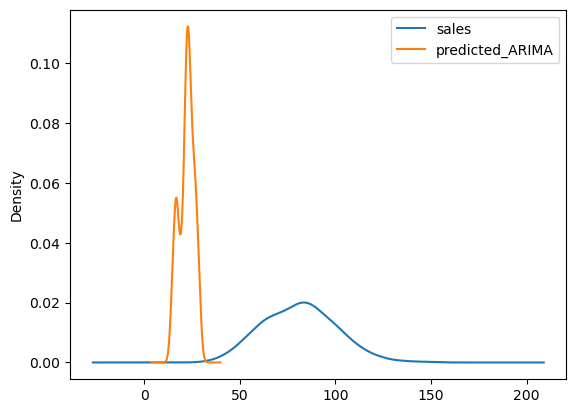

In [139]:
test_data[['sales','predicted_ARIMA']].tail(1000).plot(kind='kde')

this is the graph of sales data vs predicted datausing Arima model 

<AxesSubplot:xlabel='date'>

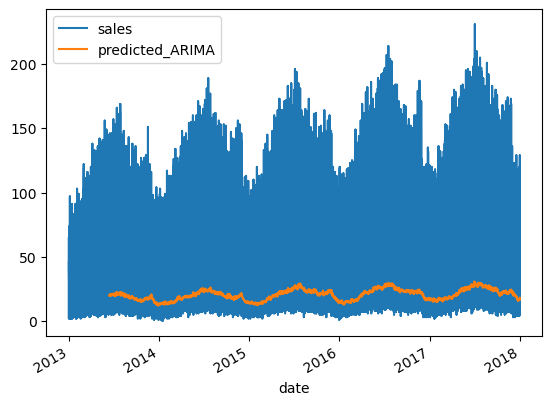

In [140]:
test_data[['sales','predicted_ARIMA']].tail.plot()

The Arima model shows huge differance because sataset is non stationary..Now we will check by Serima model.

In [45]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [46]:
conda install statsmodels

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda




Now we will check Serimax Model for prdicrion because our dataset on non stationary..

In [47]:
# Create Sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
model_SARIMA=SARIMAX(train_data['sales'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\santo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [49]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\santo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
model_SARIMA_fit

In [51]:
#prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2013-06-13 00:00:00
2017-12-31 00:00:00


Predicted_Serimax Model

In [52]:
predicted_SARIMA=model_SARIMA_fit.predict(start=datetime(2017,1,1),end=datetime(2017,12,10))
residuals=test_data['sales']-predicted_SARIMA

<AxesSubplot:xlabel='date'>

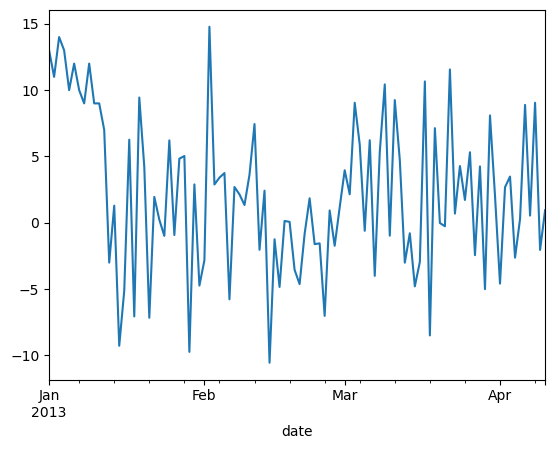

In [53]:
model_SARIMA_fit.resid.head(100).plot()

<AxesSubplot:ylabel='Density'>

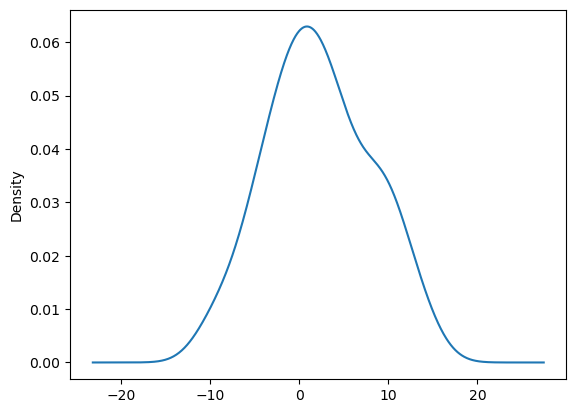

In [54]:
model_SARIMA_fit.resid.head(100).plot(kind='kde')

In [55]:
predicted_SARIMA.shape

(344,)

In [56]:
test_data['predicted sarima']=predicted_SARIMA

C:\Users\santo\AppData\Local\Temp\ipykernel_12660\852491995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted sarima']=predicted_SARIMA


In [57]:
test_data.isnull().sum()

sales                             0
sales first Differencing          0
sales second Differencing         0
sales 12 m_diff                   0
predicted sarima             739355
dtype: int64

In [58]:
predicted_SARIMA.isnull().sum()

0

In [59]:
test_data['predicted sarima']

date
2013-06-13   NaN
2013-06-14   NaN
2013-06-15   NaN
2013-06-16   NaN
2013-06-17   NaN
              ..
2017-12-27   NaN
2017-12-28   NaN
2017-12-29   NaN
2017-12-30   NaN
2017-12-31   NaN
Name: predicted sarima, Length: 911011, dtype: float64

<AxesSubplot:ylabel='Density'>

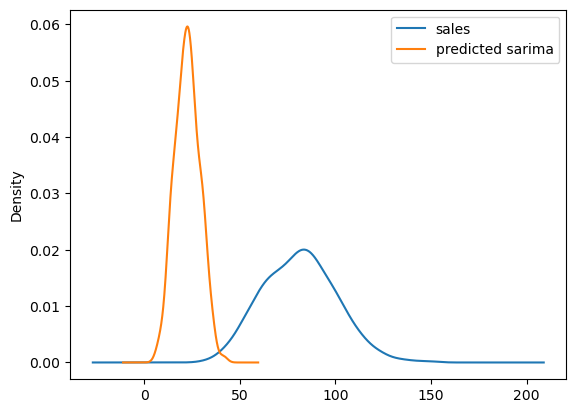

In [141]:
test_data[['sales','predicted sarima']].tail(1000).plot(kind='kde')

This is the plot of Sales Vs Predicted Sales using Serima Model

<AxesSubplot:xlabel='date'>

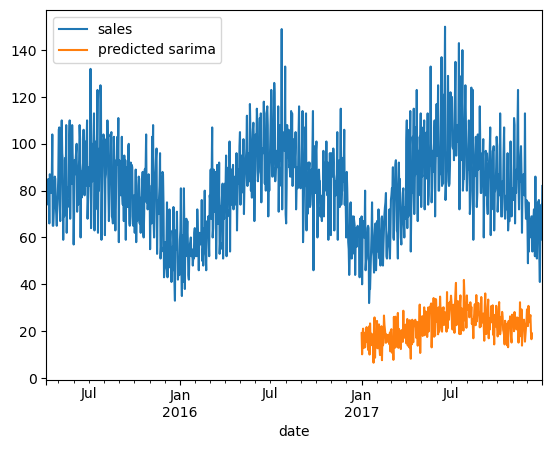

In [60]:
test_data[['sales','predicted sarima']].tail(1000).plot()

This graph Shows The Sales Vs predicted sales using Serimax model...